#Homework 3: Gradien Descent and Model (parameters/features) Selection (20pt)

In [1]:
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
#from matplotlib import cm
#%matplotlib inline
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from IPython.display import clear_output
%matplotlib inline

### Download the dataset from class, missing values imputed for you

In [2]:
Data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                    header=None, na_values=["?"])
Data.dropna(subset=Data.columns[Data.columns != 1], inplace=True)
imputer = SimpleImputer()
Data[1] = imputer.fit_transform(Data[[1]])

In [3]:
#pd.set_option('display.max_columns', None)
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,121.132075,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,121.132075,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,121.132075,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


We itroduced Stochastic Gradien Descent algorithm:

1) Initialize randomly weights $w=(w_0, w_1, \ldots, w_d)^T$

2) Take a point $\tilde{x}^{(i)}=(x_0^{(i)}, x_1^{(i)}, \ldots, x_d^{(i)})^T$ with $x_0^{(i)}=1$

3) Calculate error (MSE) on it:
$$Loss(a(x^{(i)}), y^{(i)}) = (w^T\tilde{x}^{(i)} - y^{(i)})^2 \qquad \text{ or }\quad (y^{(i)} - w^T\tilde{x}^{(i)})^2$$

4) Calculate gradient of the loss function:
$$\nabla Loss(a(x^{(i)}), y^{(i)}) = 2\tilde{x}^{(i)}(w^T\tilde{x}^{(i)} - y^{(i)})\qquad (*)$$

5) Update weights:
$$
w^{new} = w^{old} - \nabla Loss(a(x^{(i)}), y^{(i)})
$$

*Derivation of the expression $(*)$.* The loss function looks as follows:
$$Loss(a(x^{(i)}), y^{(i)})=(w_0x_0^{(i)}+w_1x_1^{(i)}+\ldots+w_dx_d^{(i)} - y^{(i)})^2$$
Gradient is a vector of derivatives with respect to every $w_j:$
$$\nabla (w_0x_0^{(i)}+w_1x_1^{(i)}+\ldots+w_dx_d^{(i)} - y^{(i)})^2
= \begin{pmatrix}2x_0^{(i)}(w_0x_0^{(i)}+w_1x_1^{(i)} + \ldots +w_dx_d^{(i)} - y^{(i)}) \\ 2x_1^{(i)}(w_0x_0^{(i)}+w_1x_1^{(i)} + \ldots +w_dx_d^{(i)} - y^{(i)})\\ \vdots \\ 2x_d^{(i)}(w_0x_0^{(i)}+w_1x_1^{(i)}+\ldots+w_dx_d^{(i)} - y^{(i)})\end{pmatrix}$$
$$= \begin{pmatrix}2x_0^{(i)} \\ 2x_1^{(i)}\\ \vdots \\ 2x_d^{(i)}\end{pmatrix} (w_0x_0^{(i)}+w_1x_1^{(i)}+\ldots+w_dx_d^{(i)} - y^{(i)}) =2\tilde{x}^{(i)}(w^T\tilde{x}^{(i)} - y^{(i)})$$

#1. (7pt) A class with realization of SGD algorithm is provided below. There is a parameter *batch_size=1.* You are asked to add code, such that for *batch_size=B>1* it performes mini-batch SGD and for *batch_size=0* it peformes standard Gradient Descent using full batch.  

Do not use $sum()$ or for loop at all. For example, to compute the loss over all the data, we use matrix nodation
$$
\frac{1}{N}\sum_{i=1}^{N}(w^T\tilde{x}^{(i)}-y^{(i)})^2=\frac{1}{N}(Xw-y)^T(Xw-y)
$$
that can be coded as
``(X.dot(w)-y).dot(X.dot(w)-y)/len(y)``.

You can get some ideas from [the SGD notebook](https://github.com/anton-selitskiy/RIT_ML/blob/main/2024_fall/Lectures/ML9.ipynb)

In [24]:
class SGD():
  def __init__(self, batch_size=1, lr=1e-3, max_epoch=100):
    self.batch_size = batch_size
    self.lr = lr
    self.max_epoch = max_epoch


  def loss(self, x, y):
    '''
    x and y are the input parameters from fit,
    they are elements of self.X and self.y of the size
    (2, ) and (1, ) respectively
    '''
    return (x.dot(self.w)-y)**2

  def loss_grad(self, x, y):
    '''
    x and y are the input parameters from fit,
    they are elements of self.X and self.y of the size
    (2, ) and (1, ) respectively
    '''
    return 2*x*(x.dot(self.w)-y)

  def batch_loss(self, X, y):
    '''
    X and y are the input parameters from fit,
    they are submatrices of self.X and self.y of the size
    (Batch_size, 2) and (Batch_size, ) respectively
    '''
    #your code here
    pass

  def batch_loss_grad(self, X, y):
    '''
    X and y are the input parameters from fit,
    they are submatrices of self.X and self.y of the size
    (Batch_size, 2) and (Batch_size, ) respectively
    '''
    #your code here
    pass

  def fit(self, X, y):
    self.X = np.hstack((np.ones((len(X),1)),X.values))
    self.y = y.values
    self.w = np.random.rand(self.X.shape[1])
    for epoch in range(self.max_epoch):
      if self.batch_size == 1:
        for i in range(len(self.X)):
          self.w -= self.lr*self.loss_grad(self.X[i,:], self.y[i])
      else:
        #self.batch_size == 0 or >1
        #your code here
        pass

      # Uncomment for Visualisation (after filling in batch_loss function or comment that line)
      if (epoch + 1) % 10 == 0:
        # clear_output(True)
        # plt.figure(figsize=(10,8))
        # plt.scatter(self.X[:,1], self.y, label="data")
        # plt.scatter(self.X[:,1], self.X.dot(self.w), color="orange", linewidth=5, label="predictions")
        # plt.xlabel("Feature 13", fontsize=14)
        # plt.ylabel("Car Price", fontsize=14)
        # #plt.title(f"SGD batch size = {self.batch_size}, epoch = {epoch}, lr={self.lr}, RMSE={np.sqrt(sgd.batch_loss(sgd.X,sgd.y))}", fontsize=18)
        # plt.legend(fontsize=14)
        # plt.show()

#2. (3pt) Run this class with the following parameters:

max_epochs = 100 and 1000

batch_size = 0, 1, 10, 50

lr = 1e-6, 1e-7, 1e-8

Report the results (RMSE) and try to explain how batch size coordinates with the learning rate.

You can scale the data and see, how different the performance will be.

In [25]:
np.random.seed(42)

In [36]:
sgd = SGD(max_epoch=100, lr=1e-7, batch_size=1)

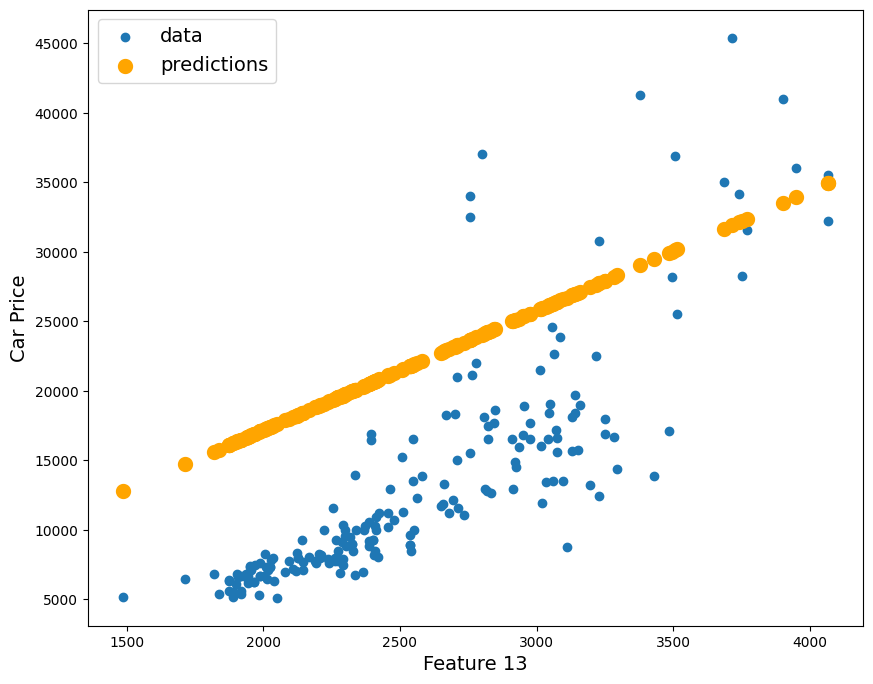

In [37]:
sgd.fit(Data[[13]],Data[25])

In [18]:
np.random.seed()

In [19]:
sgd.w

array([-1.27249893,  8.58734877])

#3. (10pt) In this part you will use the built-in functions for Linear Regression. They are using SGD under the hood.

(1pt) Plot the histograms for numerical data and bar-plots for categorical features, add $x$ axis name (file Description.txt). You can get the names of the columns as follows:
```
# List of numerical columns (assuming they have numeric data types)
numerical_columns = Data.select_dtypes(exclude=['object']).columns.tolist()

# List of nominal (categorical) columns (assuming they have object data types)
nominal_columns = Data.select_dtypes(include=['object']).columns.tolist()

```
And then methods
```
Data[column].hist()
Data[column].value_counts().plot(kind='bar')
```

(1pt) Transform categorical data into numerical ([see SGD notebook](https://github.com/anton-selitskiy/RIT_ML/blob/main/2024_fall/Lectures/ML9.ipynb)).

(3pt) Choose the features for prediction ([see Model Selection notebook](https://github.com/anton-selitskiy/RIT_ML/blob/main/2024_fall/Lectures/ML10.ipynb))

(3pt) Choose the model by the grid-search (using validation set or cross-validation)

(2pt) Train the best model and report it's performance on the Test set. Justify your choice of the metric for evaluation.

In [ ]:
# To have the names of the columns, we upload file Description.txt
descripsion = pd.read_csv('https://raw.githubusercontent.com/anton-selitskiy/RIT_ML/main/2024_spring/Homeworks/Description.txt', delimiter=':', header=None)
Data.columns = descripsion[0].str.strip() #delete extra spaces in the column names
Data.head()